In [1]:
import nltk

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
#nltk.download_shell()

In [5]:
msgs=pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['label','message'])# separate the lines based on tab spacing

In [6]:
msgs.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
msgs.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
msgs.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [9]:
msgs['length']=msgs['message'].apply(len)

In [10]:
msgs.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


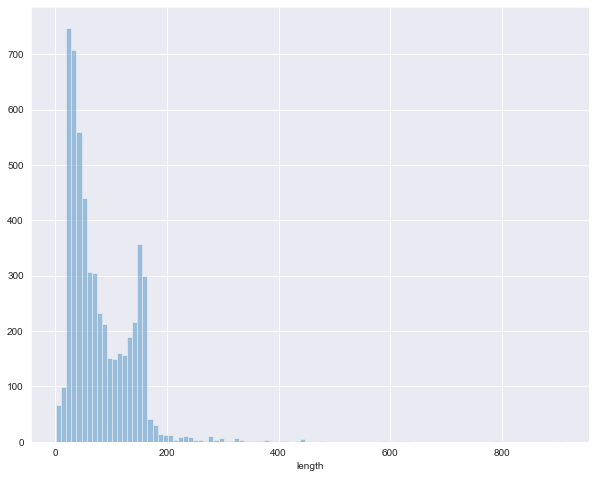

In [11]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,8))
sns.distplot(msgs['length'],bins=100,kde=False)

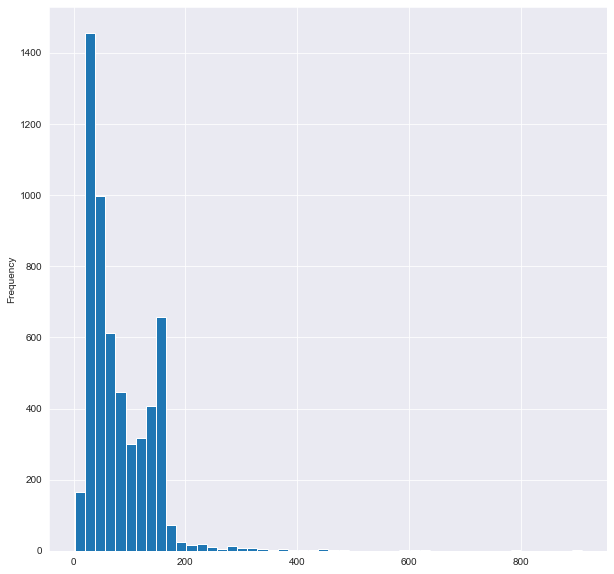

In [12]:
msgs['length'].plot(bins=50,kind='hist',figsize=(10,10))

In [13]:
msgs['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [14]:
msgs[msgs['length']==910]['message'].iloc[0]# longest message in the corpus

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002659D4D9208>,
      dtype=object)

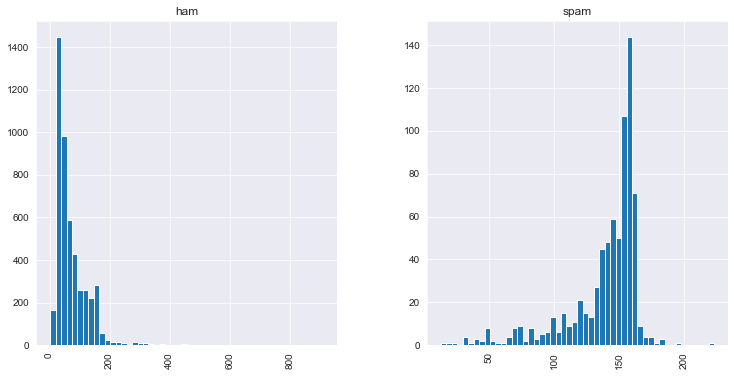

In [15]:
msgs.hist(column='length',by='label',bins=50,figsize=(12,6))# length of messages labeled as "ham" Vs. labeles as "spam"

In [16]:
mes="Hello! How's it going?. Text me when you are done."  

In [17]:
import string

In [18]:
nopunc=[char for char in mes if char not in string.punctuation]# removing all the punctuations from the message

In [19]:
nopunc

['H',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'H',
 'o',
 'w',
 's',
 ' ',
 'i',
 't',
 ' ',
 'g',
 'o',
 'i',
 'n',
 'g',
 ' ',
 'T',
 'e',
 'x',
 't',
 ' ',
 'm',
 'e',
 ' ',
 'w',
 'h',
 'e',
 'n',
 ' ',
 'y',
 'o',
 'u',
 ' ',
 'a',
 'r',
 'e',
 ' ',
 'd',
 'o',
 'n',
 'e']

In [20]:
nopunc="".join(nopunc)# join back the letters

In [21]:
"+".join(nopunc)# join can also be performed based on unique character

'H+e+l+l+o+ +H+o+w+s+ +i+t+ +g+o+i+n+g+ +T+e+x+t+ +m+e+ +w+h+e+n+ +y+o+u+ +a+r+e+ +d+o+n+e'

In [22]:
from nltk.corpus import stopwords

In [23]:
stopwords.words('english')# list of the stopwors in English

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
for w in stopwords.words('english'):
    if w=='hows':
        print('found')

In [25]:
nopunc.split()

['Hello', 'Hows', 'it', 'going', 'Text', 'me', 'when', 'you', 'are', 'done']

In [26]:
[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

['Hello', 'Hows', 'going', 'Text', 'done']

In [27]:
nostop=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [28]:
nostop

['Hello', 'Hows', 'going', 'Text', 'done']

In [37]:
def word_filter (doc):
    no_punc=[char for char in doc if char not in string.punctuation]
    no_punc="".join(no_punc)
    return [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]

In [39]:
msgs['message'].head(10).apply(word_filter)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
5    [FreeMsg, Hey, darling, 3, weeks, word, back, ...
6    [Even, brother, like, speak, treat, like, aids...
7    [per, request, Melle, Melle, Oru, Minnaminungi...
8    [WINNER, valued, network, customer, selected, ...
9    [mobile, 11, months, U, R, entitled, Update, l...
Name: message, dtype: object

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
bow_trans=CountVectorizer(analyzer=word_filter).fit(msgs['message'])# vectorizing the bag of words based on the function we created

In [47]:
len(bow_trans.vocabulary_)

11425

In [61]:
mess4=msgs['message'][3]

In [62]:
bow4=bow_trans.transform([mess4])#Transform documents(mess4) to document-term matrix based on the original bag of words

In [63]:
print(bow4)# two words were replicated twice

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [64]:
bow4.shape# this bag of words consists only of one message(mess4 in msgs)(one column) and 11425 words 
#(no. of words in bow_trans) (11425 rows)

(1, 11425)

In [67]:
print(bow_trans.get_feature_names()[4068])# checking the words that were replicated
print(bow_trans.get_feature_names()[9554])

U
say


In [68]:
mess4

'U dun say so early hor... U c already then say...'

In [70]:
bow_trans

CountVectorizer(analyzer=<function word_filter at 0x000002659CA4E438>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [71]:
msgs_bow=bow_trans.transform(msgs['message'])

In [72]:
msgs_bow.shape# the shape of sparse matrix

(5572, 11425)

In [73]:
msgs_bow.nnz# Amount of Non-Zero occurences

50548

In [75]:
sparsity= (100 * msgs_bow.nnz / (msgs_bow.shape[0] * msgs_bow.shape[1]))

In [76]:
sparsity# this value represents the percentage of the non-zero occurences to zero occurences in sparse matrix

0.07940295412668218

In [80]:
from sklearn.feature_extraction.text import TfidfTransformer

In [81]:
tfidf_trans=TfidfTransformer().fit(msgs_bow)# we didn't need to create a vectorizer since we already made one but instead 
# created a Tf-idf transformer then we fitted it to the bag of words we have

In [83]:
tfidf4=tfidf_trans.transform(bow4)# the tf-idf values for bow4 document 

In [84]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [85]:
tfidf_trans.idf_ # list of the IDF values for all of the words in the corpus

array([8.23939443, 8.5270765 , 8.93254161, ..., 8.93254161, 6.98663146,
       8.93254161])

In [86]:
bow_trans.vocabulary_['hi'] # the position of the word 'hi' inside of the original corpus

7116

In [87]:
tfidf_trans.idf_[bow_trans.vocabulary_['hi']] # the idf value of the word 'hi'

6.5811663498461135

In [88]:
tfidf_trans.idf_[bow_trans.vocabulary_['university']]# the idf value of the word 'university'

8.527076498901426

In [90]:
tfidf_msgs_bow=tfidf_trans.transform(msgs_bow)# To transform the entire bag-of-words corpus into TF-IDF corpus at once

In [91]:
tfidf_msgs_bow.shape

(5572, 11425)

In [92]:
from sklearn.naive_bayes import MultinomialNB

In [93]:
spam_detect=MultinomialNB().fit(tfidf_msgs_bow,msgs['label'])# train naive bayes model given tf-idf bow and the original labels

In [94]:
spam_detect.predict(tfidf4)# the predicated label for the tf-idf values of message no. 4

array(['ham'], dtype='<U4')

In [95]:
msgs['label'][3]

'ham'

In [96]:
all_predictions=spam_detect.predict(msgs_bow)# predicting all the corpus

In [100]:
from sklearn.metrics import classification_report,confusion_matrix

In [99]:
print (classification_report(msgs['label'],all_predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      4825
        spam       0.98      0.93      0.95       747

    accuracy                           0.99      5572
   macro avg       0.99      0.96      0.97      5572
weighted avg       0.99      0.99      0.99      5572



In [101]:
print(confusion_matrix(msgs['label'],all_predictions))

[[4812   13]
 [  56  691]]


In [102]:
from sklearn.model_selection import train_test_split

In [103]:
msg_train, msg_test, label_train, label_test = train_test_split(msgs['message'], msgs['label'], test_size=0.3)

In [104]:
from sklearn.pipeline import Pipeline

In [105]:
pipline=Pipeline(
    [
    ('bow',CountVectorizer(analyzer=word_filter)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB()),
    ]
)

In [106]:
pipline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function word_filter at 0x000002659CA4E438>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [107]:
pred=pipline.predict(msg_test)

In [109]:
print(classification_report(pred,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.95      0.98      1522
        spam       0.67      1.00      0.80       150

    accuracy                           0.96      1672
   macro avg       0.83      0.98      0.89      1672
weighted avg       0.97      0.96      0.96      1672

